# 540.432 PK: Week 10 (Multiple doses and Simulink)
Team Members: *Alejandro Soto Franco, Callie Jones, Daniel Labbe, and Samuel Bernstein*

This week, we are tasked with developing appropriate examples to illustrate the following:
- The use of a two pill loading dose at the beginning of treatment.
- The effect of a missed dose.
- The effects of taking oral medications at different times of the day.

## 1. ATTEMPTED! From ODEs to signals
Let's begin with a one-compartment model. We assume that the drug is instantly and uniformly distributed throughout the bloodstream upon administration and that it is eliminated at a first-order rate proportional to its time-dependent concentration. We set parameters like a dosage $D$, volume of distribution $V_d$ for the volume needed to contain the total amount of an administered drug at the same concentration observed in blood plasma, and elimination rate constant $k$. Now, we write the differential equation for the drug concentration in the bloodstream over time, $$\frac{dC(t)}{dt}=-kC(t)+\frac{D}{V_d} \delta(t-\tau),$$ where $\delta(t-\tau)$ is the Dirac delta function representing an instantaneous dose at time $\tau$. This introduces the necessary time domain to apply our doses. We now can consider this an output signal for a transfer function that receives an input $D(s)$. To get $C(s)$, we must take the Laplace transform: $$\begin{align*} \frac{dC(t)}{dt} &= -kC(t) + \frac{D}{V_d}\delta(t) \\ \mathcal{L}\left\{\frac{dC(t)}{dt}\right\} &= \mathcal{L}\{-kC(t)\} + \mathcal{L}\left\{\frac{D}{V_d}\delta(t)\right\} \\ sC(s) - C(0) &= -kC(s) + \frac{D}{V_d} \\ sC(s) &= -kC(s) + \frac{D}{V_d} \\ (s+k)C(s) &= \frac{D}{V_d} \\ C(s) &= \frac{D}{V_d(s + k)} ,\end{align*}$$ by assuming that $C(t=0)=0$ (recall that $\mathcal{L}{f'(t)}=sF(s)-f(0)$). This simple task sets us up to model a one-compartment pharmacokinetic system with variable doses at specific times $\tau_1, \tau_2, \tau_3,\ldots,\tau_n$ can be done using a combination of Laplace transforms, transfer functions, and step functions. By instead writing $$\frac{dC(t)}{dt}=-kC(t)+\text{Input}(t),$$ we can provide the generalized sum of doses $$\text{Input}(t)=\frac{D_1}{V_d}u(t-\tau_1)+\ldots+\frac{D_n}{V_d}u(t-\tau_n)$$ for dose administered $D_i$ at time $\tau_i$ and then take the Laplace transform, $$sC(s)-C(0)=-kC(s)+\sum_{i=1}^{n}{\frac{D_i}{V_d}e^{-s\tau_i}}.$$ Assuming $C(0)=0$, we can solve to get $$C(s)=\frac{\sum_{i=1}^{n}{\frac{D_i}{V_d}e^{-s\tau_i}}}{s+k}.$$ Since the sum represents the input rate in the Laplace transform, our transfer function $H(s)$ is simply $$H(s)=\frac{1}{s+k}.$$

## 2. Admitting defeat
Unfortunately, after extensive tinkering in Simulink, I was unable to get a reasonable output from the system. To get code for the week, I provided a Python script below:

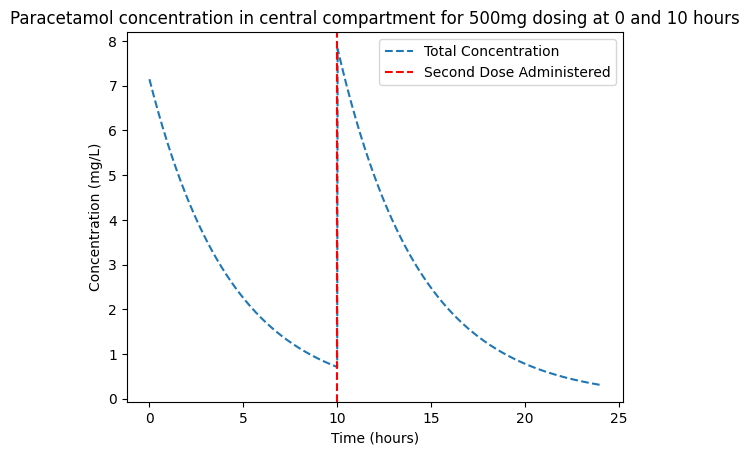

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Values retrieved from doi: 10.1111/j.1365-2125.1980.tb01812.x
# Define parameters
D = 500  # dose in mg
F = 1  # bioavailability (1 in IV case)
V_d = 70  # volume of distribution in L (assuming 70 kg person and 70L of distributed circulation)
t_half = 3  # elimination half-life in hours
k_e = 0.693 / t_half  # elimination rate constant

# Define time points
time = np.linspace(0, 24, 1000)  # from 0 to 24 hours, 1000 points

# Calculate concentrations
C1 = (D * F / V_d) * np.exp(-k_e * time)
C2 = (D * F / V_d) * np.exp(-k_e * (time - 10)) * (time > 10)  # second dose starts affecting at 10 hours
C_total = C1 + C2

# Plot the graph
plt.plot(time, C_total, label='Total Concentration', linestyle='--')
plt.axvline(x=10, color='r', linestyle='--', label='Second Dose Administered')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Paracetamol concentration in central compartment for 500mg dosing at 0 and 10 hours')
plt.legend()
plt.grid(False)
plt.show()


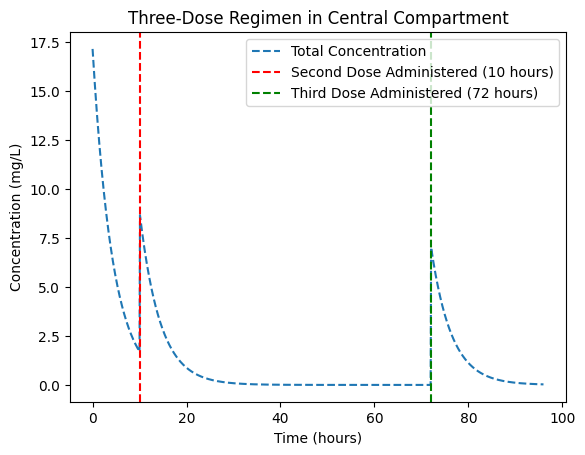

In [51]:
# Define parameters
D1 = 1200  # first dose in mg
D2 = 500   # second and third dose in mg
F = 1   # bioavailability in IV
V_d = 70   # volume of distribution in L
t_half = 3 # elimination half-life in hours
k_e = 0.693 / t_half  # elimination rate constant

# Define time points
time = np.linspace(0, 96, 1000)  # from 0 to 96 hours (added 72 hours for the third dose), 1000 points

# Calculate concentrations
C1 = (D1 * F / V_d) * np.exp(-k_e * time)  # first dose
C2 = (D2 * F / V_d) * np.exp(-k_e * (time - 10)) * (time > 10)  # second dose starts affecting at 10 hours
C3 = (D2 * F / V_d) * np.exp(-k_e * (time - 72)) * (time > 72)  # third dose starts affecting at 72 hours
C_total = C1 + C2 + C3  # total concentration

# Plot the graph
plt.plot(time, C_total, label='Total Concentration', linestyle='--')
plt.axvline(x=10, color='r', linestyle='--', label='Second Dose Administered (10 hours)')
plt.axvline(x=72, color='g', linestyle='--', label='Third Dose Administered (72 hours)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/L)')
plt.title('Three-Dose Regimen in Central Compartment')
plt.legend()
plt.grid(False)
plt.show()
